In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import collections
%matplotlib inline

In [6]:
data = pd.read_csv("Consumer_Complaints.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823
5,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,TX,75025,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468981
6,07/29/2013,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"NRA Group, LLC",VA,20147,NaN,NaN,Web,08/07/2013,Closed with non-monetary relief,Yes,No,467801
7,07/29/2013,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"SunTrust Banks, Inc.",FL,32818,NaN,NaN,Referral,08/01/2013,Closed with explanation,Yes,Yes,475728
8,07/29/2013,Credit card,NaN,Billing statement,NaN,NaN,NaN,Citibank,OH,45247,NaN,NaN,Referral,07/30/2013,Closed with explanation,Yes,Yes,469026
9,07/29/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,NV,89511,NaN,NaN,Referral,07/30/2013,Closed with explanation,Yes,Yes,469035


In [3]:
tmp = data.copy(deep=True)

In [4]:
tmp['Data received'] = pd.to_datetime(tmp['Date received'])

In [35]:
tmp = tmp.set_index('Data received')

In [37]:
tmp['count'] = 1

In [39]:
tmp = tmp['count']

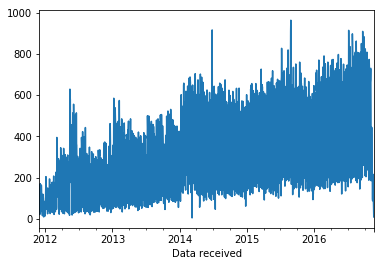

In [42]:
tmp.resample('D').sum().plot()

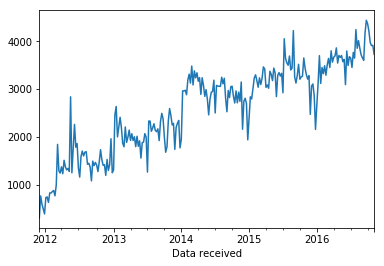

In [54]:
tmp.resample('W').sum()[:-3].plot()

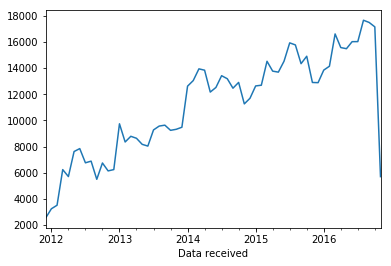

In [49]:
tmp.resample('MS').sum().plot()

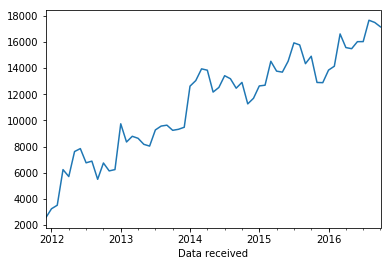

In [48]:
tmp.resample('MS').sum()[:-1].plot()

In [6]:
from collections import Counter


In [7]:
tmp['Tags'].dropna().unique()

array(['Older American', 'Servicemember', 'Older American, Servicemember'], dtype=object)

In [12]:
Counter(tmp[tmp['Tags'] == 'Older American']['Issue']).most_common(5)

[('Loan modification,collection,foreclosure', 7331),
 ('Loan servicing, payments, escrow account', 7160),
 ('Incorrect information on credit report', 6272),
 ("Cont'd attempts collect debt not owed", 4152),
 ('Account opening, closing, or management', 3207),
 ('Deposits and withdrawals', 1976),
 ('Application, originator, mortgage broker', 1889),
 ('Communication tactics', 1718),
 ('Billing disputes', 1622),
 ('Unable to get credit report/credit score', 1371)]

In [13]:
Counter(tmp[tmp['Tags'] == 'Servicemember']['Issue']).most_common(5)

[("Cont'd attempts collect debt not owed", 4471),
 ('Loan modification,collection,foreclosure', 4041),
 ('Incorrect information on credit report', 3552),
 ('Loan servicing, payments, escrow account', 2633),
 ('Disclosure verification of debt', 1747),
 ('Communication tactics', 1700),
 ('Account opening, closing, or management', 1083),
 ('False statements or representation', 947),
 ('Managing the loan or lease', 908),
 ('Deposits and withdrawals', 783)]

In [14]:
older_count = Counter(tmp[tmp['Tags'] == 'Older American']['Issue']).most_common(10)
service_count = Counter(tmp[tmp['Tags'] == 'Servicemember']['Issue']).most_common(10)

In [23]:
pi_chart_data_older = pd.DataFrame({'Issue':[i[0] for i in older_count],'count':[i[1] for i in older_count]})
pi_chart_data_service = pd.DataFrame({'Issue':[i[0] for i in service_count],'count':[i[1] for i in service_count]})

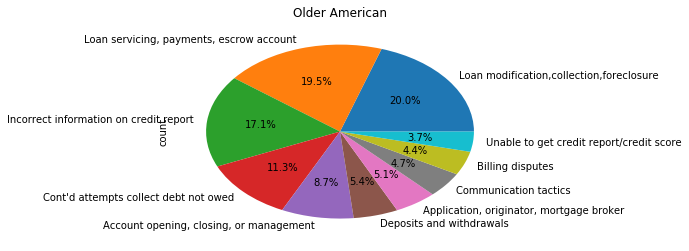

In [25]:
pi_chart_data_older.plot(title='Older American', kind='pie',y='count',autopct='%1.1f%%',labels=pi_chart_data_older['Issue'],legend=False)

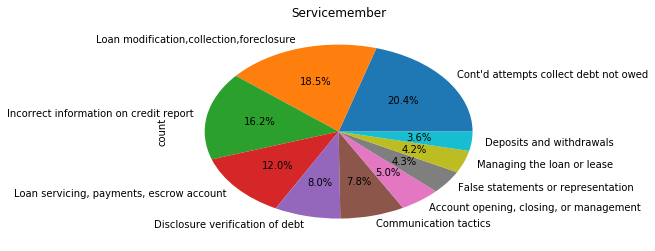

In [27]:
pi_chart_data_service.plot(title='Servicemember', kind='pie',y='count',autopct='%1.1f%%',labels=pi_chart_data_service['Issue'],legend=False)

# Regression

In [9]:
data["Tags"]

0                    NaN
1         Older American
2                    NaN
3                    NaN
4                    NaN
5                    NaN
6                    NaN
7                    NaN
8                    NaN
9                    NaN
10                   NaN
11                   NaN
12                   NaN
13        Older American
14        Older American
15                   NaN
16                   NaN
17                   NaN
18                   NaN
19                   NaN
20                   NaN
21                   NaN
22                   NaN
23                   NaN
24                   NaN
25                   NaN
26                   NaN
27                   NaN
28                   NaN
29                   NaN
               ...      
670568    Older American
670569               NaN
670570               NaN
670571               NaN
670572               NaN
670573               NaN
670574               NaN
670575               NaN
670576               NaN
